In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [96]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В датасете всего 13 числовых столбцов и 17 строковых. 
Видим, что один столбец имеет название, которое не будет читаться. Заменим запятую и пробел на нижнее подчеркивание

In [97]:
stud.columns = stud.columns.str.replace(', ', '_')

In [98]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

По информации о датасете можно понять, что пустых значений не очень много. В среднем не более 10%.
Определим функцию замены отсутствующих значений на медианные

In [99]:
def replacemed(x):
    x = x.fillna(x.median())
    return x

Для начала проверим все численные столбцы на наличие выбросов и количество пустых значений

In [100]:
print("Количество пустых значений:", (stud.age.isna().sum()))
pd.DataFrame(stud.age.value_counts())

Количество пустых значений: 0


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Посмотрим на распределение данных в столбце 

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

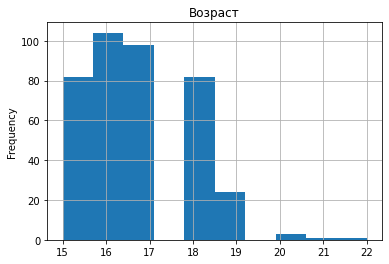

In [101]:
stud['age'].plot(kind='hist', grid=True, title='Возраст')
stud.age.describe()

Видно, что пустых значений и выбросов нет. Данные соответствуют условию, что возраст от 15 до 22 лет. 
Основное число учеников составляют учащиеся в возрасте от 15 до 17 лет.

In [102]:
print("Количество пустых значений:", (stud.Medu.isna().sum()))
pd.DataFrame(stud.Medu.value_counts())

Количество пустых значений: 3


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Распределение данных

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

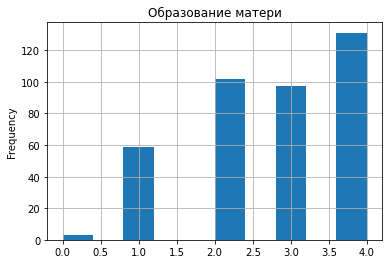

In [103]:
stud['Medu'].plot(kind='hist', grid=True, title='Образование матери')
stud.Medu.describe()

Видим, что есть 3 нулевых значения. Заменим их на медианные значения. 
В целом, у большинства матерей учеников высшее образование

In [104]:
replacemed(stud.Medu)

0      4.0
1      1.0
2      1.0
3      4.0
4      3.0
      ... 
390    2.0
391    3.0
392    1.0
393    3.0
394    1.0
Name: Medu, Length: 395, dtype: float64

In [105]:
print("Количество пустых значений:", (stud.Fedu.isna().sum()))
pd.DataFrame(stud.Fedu.value_counts())

Количество пустых значений: 24


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Распределение данных

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

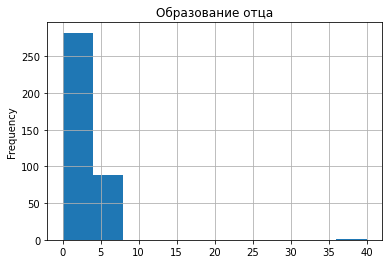

In [106]:
stud['Fedu'].plot(kind='hist', grid=True, title='Образование отца')
stud.Fedu.describe()

Очевидно, что в данных есть выбросы. Чтобы их отфильтровать, воспользуемся формулой межквартильного размаха.

In [107]:
IQR = stud.Fedu.quantile(0.75) - stud.Fedu.quantile(0.25)
perc25 = stud.Fedu.quantile(0.25)
perc75 = stud.Fedu.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


Поскольку нам дано, что значения этого столбца могут лежать в пределах от 0 до 4, то отфильтруем все остальные значения.
Пустые ячейки можно заменить на медианы, так как их немного.

In [108]:
replacemed(stud.Fedu)
stud = stud.loc[(stud.Fedu >= 0) & (stud.Fedu < 4.5)]

Построим новое распределение с учетом изменений.

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

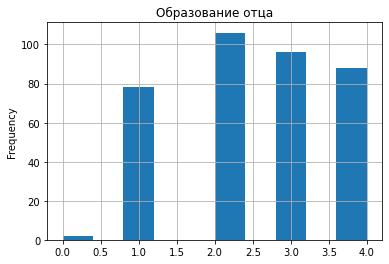

In [109]:
stud['Fedu'].plot(kind='hist', grid=True, title='Образование отца')
stud.Fedu.describe()

Здесь видно, что в большинстве случаев отцы учеников окончили 5-9 классы.

In [110]:
print("Количество пустых значений:", (stud.traveltime.isna().sum()))
pd.DataFrame(stud.traveltime.value_counts())

Количество пустых значений: 25


,traveltime
1.0,225
2.0,92
3.0,21
4.0,7


count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

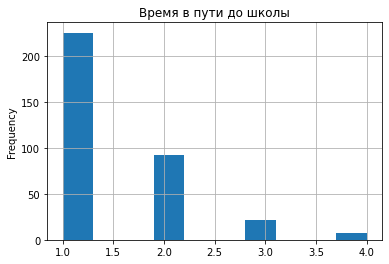

In [111]:
stud['traveltime'].plot(kind='hist', grid=True, title='Время в пути до школы')
stud.traveltime.describe()

В этом столбце все данные находятся в требуемом диапазоне. Видно, что у более чем половины учеников время пути занимает < 15 минут.
Есть 25 пустых значений, но так как уже сейчас можно сделать вывод о распределении данных, то заменять не будем.

In [112]:
print("Количество пустых значений:", (stud.studytime.isna().sum()))
pd.DataFrame(stud.studytime.value_counts())

Количество пустых значений: 7


,studytime
2.0,182
1.0,98
3.0,58
4.0,25


count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

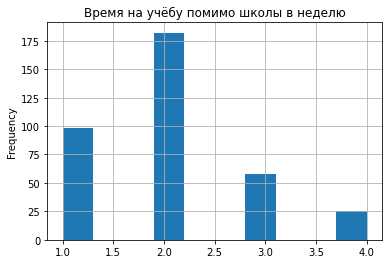

In [113]:
stud['studytime'].plot(kind='hist', grid=True,
                       title='Время на учёбу помимо школы в неделю')
stud.studytime.describe()

В этом столбце все данные также находятся в диапазоне от 1 до 4. У большей части учеников время время на учебу вне школы занимает 2-5 часов. 7 пустых значений заменять не будем, как и в предыдущем случае.

In [114]:
print("Количество пустых значений:", (stud.failures.isna().sum()))
pd.DataFrame(stud.failures.value_counts())

Количество пустых значений: 19


,failures
0.0,277
1.0,45
3.0,15
2.0,14


count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

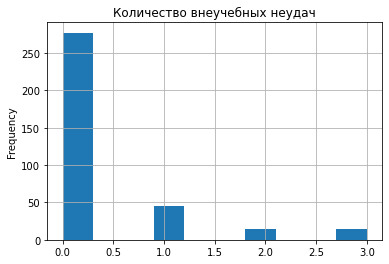

In [115]:
stud['failures'].plot(kind='hist', grid=True,
                      title='Количество внеучебных неудач')
stud.failures.describe()

В данном столбце никаких аномальных значений нет. По распределению видно, что у подавляющего большинства отсутствуют внеучебные неудачи. Есть 19 пропущенных значений. Однако их замена на выводы не повлияет, поэтому оставим данные без изменений.

In [116]:
print("Количество пустых значений:", (stud.studytime_granular.isna().sum()))
pd.DataFrame(stud.studytime_granular.value_counts())

Количество пустых значений: 7


,studytime_granular
-6.0,182
-3.0,98
-9.0,58
-12.0,25


count    363.000000
mean      -6.082645
std        2.521466
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

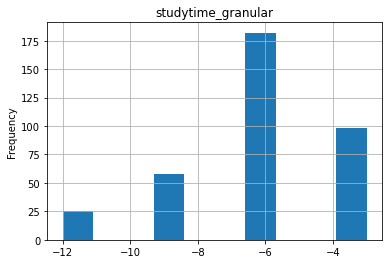

In [117]:
stud['studytime_granular'].plot(
    kind='hist', grid=True, title='studytime_granular')
stud.studytime_granular.describe()

В данном столбце количество уникальных значений равно четырем, а данные разбиты на группы с численным признаком от -3 до -12 с шагом -3. Распределение значений похоже на распределение данных в столбце 'Время на учёбу помимо школы в неделю'. Поэтому будет полезным узнать насколько эти значения связаны между собой.

In [118]:
stud['studytime'].corr(stud['studytime_granular'])

-0.9999999999999997

Здесь видна отрицательная корреляция между столбцами, данные 'studytime_granular' имеют обратную зависимость от данных 'studytime', а коэффициент корреляции по модулю очень высокий. Для построения модели для переменной score достаточно оставить столбец 'studytime', а коррелирующий с ним параметр можно удалить, так как его влияение на значение score будет аналогичным.

In [119]:
stud = stud.drop('studytime_granular', 1)

In [120]:
print("Количество пустых значений:", (stud.famrel.isna().sum()))
pd.DataFrame(stud.famrel.value_counts())

Количество пустых значений: 24


,famrel
4.0,168
5.0,95
3.0,59
2.0,16
1.0,7
-1.0,1


count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

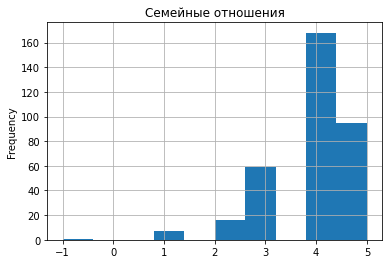

In [121]:
stud['famrel'].plot(kind='hist', grid=True, title='Семейные отношения')
stud.famrel.describe()

В столбце есть значение, выходящее за пределы требуемого диапазона. Отфильтруем его, а пустые ячейки заменять не будем.

In [122]:
stud = stud.loc[stud.famrel > (-1)]

Судя по распределению, в семьях учеников хорошие семейные отношения.

In [123]:
print("Количество пустых значений:", (stud.freetime.isna().sum()))
pd.DataFrame(stud.freetime.value_counts())

Количество пустых значений: 9


,freetime
3.0,134
4.0,97
2.0,54
5.0,34
1.0,17


count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

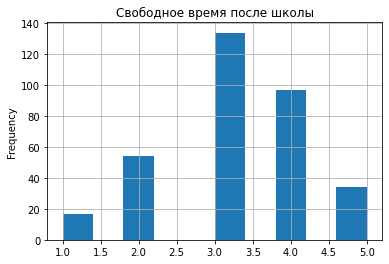

In [124]:
stud['freetime'].plot(kind='hist', grid=True, title='Свободное время после школы')
stud.freetime.describe()

Данные представлены без выбросов, не выходящие за нужный интервал. Распределение показывает среднее количество свободного времени у большинства учащихся

In [125]:
print("Количество пустых значений:", (stud.goout.isna().sum()))
pd.DataFrame(stud.goout.value_counts())

Количество пустых значений: 8


,goout
3.0,115
2.0,87
4.0,71
5.0,45
1.0,19


count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

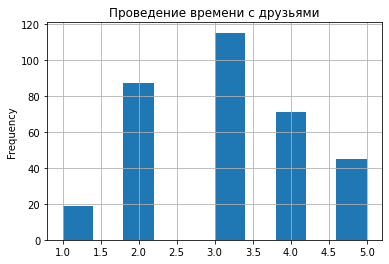

In [126]:
stud['goout'].plot(kind='hist', grid=True,
                   title='Проведение времени с друзьями')
stud.goout.describe()

В данном случае также нет выбросов, данные распределены примерно равномерно, но у большинства среднее колчество времени для встреч с друзьями

In [127]:
print("Количество пустых значений:", (stud.health.isna().sum()))
pd.DataFrame(stud.health.value_counts())

Количество пустых значений: 13


,health
5.0,111
3.0,81
4.0,58
1.0,42
2.0,40


count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

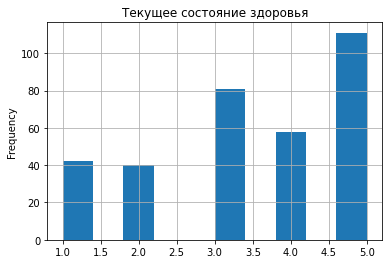

In [128]:
stud['health'].plot(kind='hist', grid=True, title='Текущее состояние здоровья')
stud.health.describe()

Так как в данном столбце значения распределены довольно близко, для выявления тенденции можно 13 пустых значений заменить на медианное.

In [129]:
replacemed(stud.health)

0      3.0
1      3.0
2      3.0
3      5.0
4      5.0
      ... 
390    4.0
391    2.0
392    3.0
393    5.0
394    5.0
Name: health, Length: 345, dtype: float64

In [130]:
print("Количество пустых значений:", (stud.absences.isna().sum()))
pd.DataFrame(stud.absences.value_counts())

Количество пустых значений: 12


,absences
0.0,95
2.0,54
4.0,47
6.0,27
8.0,21
10.0,14
12.0,11
14.0,9
3.0,8
16.0,7


count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

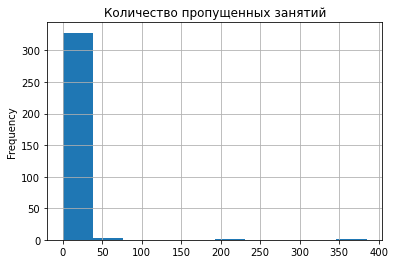

In [131]:
stud['absences'].plot(kind='hist', grid=True,
                      title='Количество пропущенных занятий')
stud.absences.describe()

Судя по распределению данных, в столбце есть выбросы. Найдем их, чтобы отфильтровать

In [132]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


Поскольку количество пропущенных занятий является неотрицательным числом, то выставим ограничения от 0 до 20, а пустые ячейки заменим медианным значением.

In [133]:
replacemed(stud.absences)
stud = stud.loc[(stud.absences >= 0) & (stud.absences <= 20)]

Построим новое распределение

<AxesSubplot:title={'center':'Количество пропущенных занятий'}, ylabel='Frequency'>

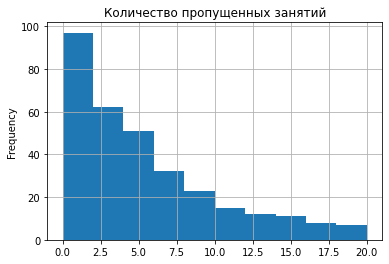

In [134]:
stud['absences'].plot(kind='hist', grid=True,
                      title='Количество пропущенных занятий')

Заметна тенденция на снижение количества пропущенных занятий. Около четверти учеников вообще не пропускали занятия

In [135]:
print("Количество пустых значений:", (stud.score.isna().sum()))
pd.DataFrame(stud.score.value_counts())

Количество пустых значений: 5


,score
50.0,50
55.0,38
0.0,30
65.0,27
75.0,25
60.0,25
70.0,23
40.0,22
45.0,17
80.0,16


В данном столбце есть пустые значения. Так как баллы являются целевым параметром, но пропущенные значения придется удалить 

In [136]:
stud.score = stud.score.dropna()

Построим распределение данных и сделаем выводы об аномальных значениях

count    313.000000
mean      52.124601
std       22.511546
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

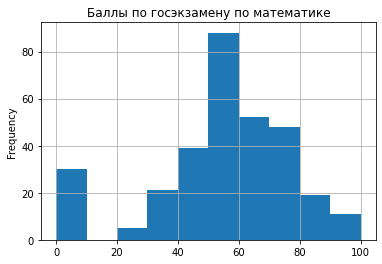

In [139]:
stud['score'].plot(kind='hist', grid=True,
                   title='Баллы по госэкзамену по математике')
stud.score.describe()

Данные находятся в пределах от 0 до 100, что вполне объяснимо для баллов за экзамен. Видно, что у большинства оценки за экзамен соответствуют средним (около 52 баллов). Но также много 0 баллов, что скорее всего не является аномальным значением.

Теперь проведем анализ номинативных переменных. Так как их довольно много, для удобства будем анализировать небольшими группами.

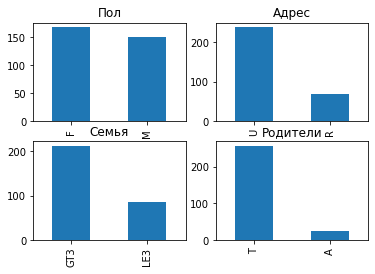

In [143]:
plt.subplot(2, 2, 1)
stud['sex'].value_counts().plot(kind='bar')
plt.title("Пол")

plt.subplot(2, 2, 2)
stud['address'].value_counts().plot(kind='bar')
plt.title("Адрес")

plt.subplot(2, 2, 3)
stud['famsize'].value_counts().plot(kind='bar')
plt.title("Семья")

plt.subplot(2, 2, 4)
stud['Pstatus'].value_counts().plot(kind='bar')
plt.title("Родители")

plt.show()

Данные по половому признаку распределены одинаково. Что касается остальных параметров, то со значительным отрывом большинство учеников живут в городе, имеют большую семью, а их родители живут вместе

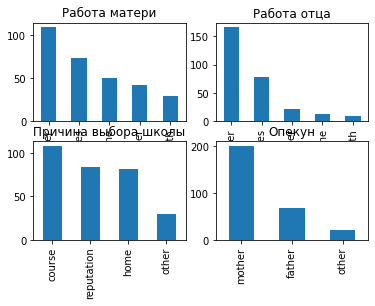

In [153]:
plt.subplot(2, 2, 1)
stud['Mjob'].value_counts().plot(kind='bar')
plt.title("Работа матери")

plt.subplot(2, 2, 2)
stud['Fjob'].value_counts().plot(kind='bar')
plt.title("Работа отца")

plt.subplot(2, 2, 3)
stud['reason'].value_counts().plot(kind='bar')
plt.title("Причина выбора школы")

plt.subplot(2, 2, 4)
stud['guardian'].value_counts().plot(kind='bar')
plt.title("Опекун")

plt.show()

Данные по работе матерей и отцов учащихся распределены примерно одинаково. В обоих случаях большинство родителей работают в других сферах, не описанных в датасете. Причины выбора школы имеют равномерное распределение. У большинства учеников мать является опекуном

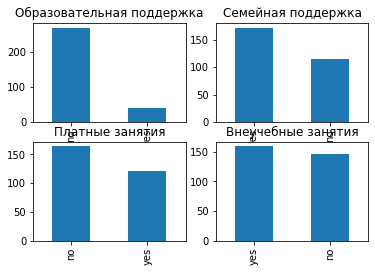

In [145]:
plt.subplot(2, 2, 1)
stud['schoolsup'].value_counts().plot(kind='bar')
plt.title("Образовательная поддержка")

plt.subplot(2, 2, 2)
stud['famsup'].value_counts().plot(kind='bar')
plt.title("Семейная поддержка")

plt.subplot(2, 2, 3)
stud['paid'].value_counts().plot(kind='bar')
plt.title("Платные занятия")

plt.subplot(2, 2, 4)
stud['activities'].value_counts().plot(kind='bar')
plt.title("Внеучебные занятия")

plt.show()

Большая часть учеников не получали образовательной поддержки, однако семейная поддержка преобладает. Процент дополнительных занятий распределен примерно одинаково.

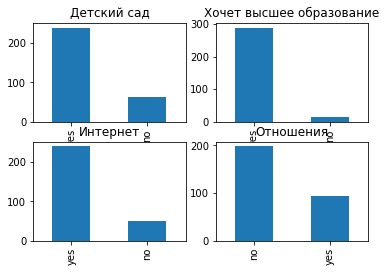

In [148]:
plt.subplot(2, 2, 1)
stud['nursery'].value_counts().plot(kind='bar')
plt.title("Детский сад")

plt.subplot(2, 2, 2)
stud['higher'].value_counts().plot(kind='bar')
plt.title("Хочет высшее образование")

plt.subplot(2, 2, 3)
stud['internet'].value_counts().plot(kind='bar')
plt.title("Интернет")

plt.subplot(2, 2, 4)
stud['romantic'].value_counts().plot(kind='bar')
plt.title("Отношения")

plt.show()

С достаточно большой разницей преобладает количество учеников, посещавших детский сад, желающих получить высшее образование и имеющих интернет. Соотношение учеников, состоящих в отношениях отличается примерно в 2 раза.

Построим корреляционную матрицу для числовых значений и тепловую карту для наглядности

In [149]:
correl = stud.corr()
correl

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.176250,-0.193469,0.073914,-0.015188,0.219710,0.058482,0.045144,0.097906,-0.061147,0.138921,-0.152937
Medu,-0.176250,1.000000,0.647425,-0.188525,0.096564,-0.242613,-0.034579,0.006825,0.056204,-0.079287,0.102861,0.198240
Fedu,-0.193469,0.647425,1.000000,-0.193201,0.003729,-0.281114,-0.040042,-0.018485,0.011471,0.007139,-0.009144,0.114211
traveltime,0.073914,-0.188525,-0.193201,1.000000,-0.109333,0.083311,-0.051752,0.009835,0.004574,-0.011856,-0.053176,-0.067642
studytime,-0.015188,0.096564,0.003729,-0.109333,1.000000,-0.143829,0.018273,-0.141048,-0.048134,-0.102211,-0.069378,0.119395
failures,0.219710,-0.242613,-0.281114,0.083311,-0.143829,1.000000,0.031704,0.117818,0.084852,0.067415,0.059202,-0.311995
famrel,0.058482,-0.034579,-0.040042,-0.051752,0.018273,0.031704,1.000000,0.169739,0.092249,0.096186,-0.061762,0.045598
freetime,0.045144,0.006825,-0.018485,0.009835,-0.141048,0.117818,0.169739,1.000000,0.283708,0.074485,0.100271,0.042375
goout,0.097906,0.056204,0.011471,0.004574,-0.048134,0.084852,0.092249,0.283708,1.000000,-0.008117,0.061950,-0.127803
health,-0.061147,-0.079287,0.007139,-0.011856,-0.102211,0.067415,0.096186,0.074485,-0.008117,1.000000,-0.003061,-0.046172


<AxesSubplot:>

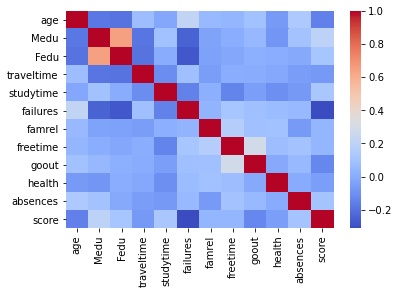

In [150]:
sns.heatmap(correl, cmap = 'coolwarm')

Чтобы понять, какие параметры больше остальных влияют на итоговую оценку, отсортируем коэффициент корреляции в порядке возрастания

In [151]:
correl.sort_values(by=['score']).loc[:, 'score']

failures     -0.311995
age          -0.152937
goout        -0.127803
traveltime   -0.067642
health       -0.046172
freetime      0.042375
famrel        0.045598
absences      0.107494
Fedu          0.114211
studytime     0.119395
Medu          0.198240
score         1.000000
Name: score, dtype: float64

Видно, что отрицательная корреляция сильнее с параметром 'failures'. То есть, чем больше внеучебных неудач, тем ниже итоговая оценка. Что касается положительной корреляции, то коэффициент выше у параметра 'Medu'. Поскольку мы уже выяснили, что в большинстве семей мать является опекуном, то и образование матери имеет влияние на обучение в целом и итоговые баллы за экзамен.

Довольно слабо коррелируют с итоговой оценкой такие параметры, как состояние здоровья, а также время, занимаемое на дорогу, свободное время и отношения в семье. Эти показатели вполне можно исключить при построении модели.